# Computational Finance I
**Lab-Exercise No. 2**


## Write your data

In [1]:
print("First Name: ", "Zhirui")
print("Sure Name: ", "Tang")
print("Matriculation number: ", "1942800")
print("E-mail: ", "zhirui.tang@uni-wuppertal.de")
print("Degree Type: ", "Master") # Bachelor or Master
print("Degree Name: ", "Master of Science in Computer Simulation in Science") # E.g. Master of Science in Computer Simulation in Science

First Name:  Zhirui
Sure Name:  Tang
Matriculation number:  1942800
E-mail:  zhirui.tang@uni-wuppertal.de
Degree Type:  Master
Degree Name:  Master of Science in Computer Simulation in Science


# For the programming task write the corresponding Python codes that are asked in each section below.

# P2: Implied volatility
In the lecture we mentioned that the volatility of stock can not be directly observed.
Given option prices observed in the market, the volatility can be computed using Black-Scholes formula.
We will use the Newton-Raphson method to calculate the implied volatility.

## Import all necessary modules

In [4]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.stats import norm

# Start coding
**Note:** 
* Add code where you find the comment "# Add code here"
* Get the same output as it is presented in the Markdown text **Expected Output:**

## Define a function to calculate implied volatiliry using Newton-Raphson method

In [5]:
def impvol(S, r, T, K, C_market, sigma_0, tol):

    """
    Function that calculates implied volatility using Newton-Raphson method
    
        sigma(k+1) = sigma(k) - (C(sigma(k))- C_market)/k, #k kappa
    
    where sigma0 is an initial guess of volatility

    Input: 
          S       -> Stock price
          r       -> Interest rate
          T       -> Maturity
          K       -> Strike price
          C_market-> European option value (given)
          sigma_0 -> initial guess of implied volatility
          tol     -> tolerance for NR method

    Output:
         im_sigma -> Implied volatility
    """
    # Add code here
    sigma_o = 10000
    sigma_n = sigma_0
    while abs(sigma_n - sigma_o) > tol:
        sigma_o = sigma_n
        d_1 = (log(S/K) + (r+0.5*sigma_o**2)*T) / (sigma_o*sqrt(T))
        d_2 = (log(S/K) + (r-0.5*sigma_o**2)*T) / (sigma_o*sqrt(T))
        C = S * norm.cdf(d_1) - K*exp(-r*T)*norm.cdf(d_2)
        vega = S * norm.pdf(d_1) * sqrt(T)
        sigma_n = sigma_o - (C-C_market) / vega
        #K or vega both ok? I got tiny difference result using both them
    return sigma_n

Let $S=129,\,r=0,\,T=30/360.$ Test your code using the given market prices of European calls in the following table.
![title](table1.png)
For the Newton-Raphson method, use a tolerance of $10^{-10}$.

## Input parameters

In [7]:
# Input parameters
sigma_0 = 0.1
K = [*range(124, 137, 1)]
S0 = 129
r = 0
T = 30/360
C_market = [6.03, 5.23, 4.49, 3.79, 3.14, 2.55, 2.02, 1.59, 1.26, 1.00, 0.81, 0.67, 0.55]
tol = 1e-10

## Test the code based on above data: plot the graph, what do you observe?

Text(0.5, 0, 'Strike price')

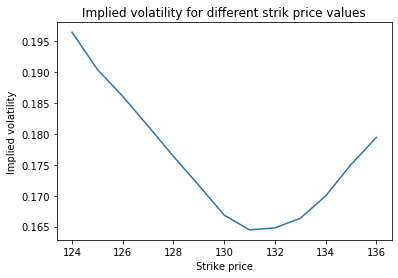

In [8]:
# Implement impvol function to calculate the implied volatility for each strike price and option price
# Add code here
imp=[]
for i in range(len(C_market)):
    imp.append(impvol(S0, r, T, K[i], C_market[i], sigma_0, tol))
plt.plot(K, imp)
plt.title("Implied volatility for different strik price values")
plt.ylabel("Implied volatility")
plt.xlabel("Strike price")

### Will the implied volatilities using the corresponding market prices of European puts be same?

In [36]:
# Answer with a print statement
# Add code here
print("Taking away all frictions and imcompleteness of the market also the arbitrage situation, \
according to the Put-Call parity, we know that the V_PC is affected by V_EC, and the Put-Call parity holds \
if and only if the implied volatilities of put and call are the same.")

Taking away all frictions and imcompleteness of the market also the arbitrage situation, according to the Put-Call parity, we know that the V_PC is affected by V_EC, and the Put-Call parity holds if and only if the implied volatilities of put and call are the same.


In the lecture we have seen that the Black-Scholes model can be extended by including a time-dependent volatility function. Given the volatility function
$$ \sigma(t) = \sigma_0 \exp(−at) + b(1−\exp(−at)),$$ 
ﬁnd the optimal value of parameters $\sigma_0, a, b$ by ﬁtting the prices of the extended BS-formula to the market prices given in the following table, where $S = 129, r = 0, K = 129$. For the ﬁtting you can use any optimization method, e.g., least squares.
![title](table2.png)

Plot a graph of the volatility function using the obtained optimal parameter values and compare it to the corresponding implied volatility for diﬀerent maturities.

## New input

In [9]:
# New input
Time = [1/12, 1/4, 1/2, 1]
Value = [2.55, 4.49, 6.70, 10.13]
Price = 129
Strike = 129
Rate = 0
Sigma_0 = 0.2
Tol = 1e-10

## Apply NR for the new input

Text(0.5, 0, 'Time')

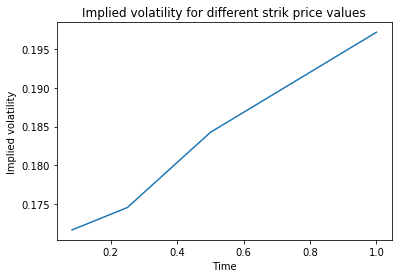

In [10]:
# Add code here
imp=[]
for i in range(len(Value)):
    imp.append(impvol(Price, Rate, Time[i], Strike, Value[i], Sigma_0, Tol))
plt.plot(Time, imp)
plt.title("Implied volatility for different strik price values")
plt.ylabel("Implied volatility")
plt.xlabel("Time")

## Define a function for our given time dependent volatility 

In [11]:
def func(t, sigma_0, a, b):
    """
    Function that creates the time dependent volatility function
        sigma(t) = sigma_0 * exp(−a*t) + b*(1−exp(−a*t))
    Input: 
          t       -> time
          sigma_0 -> Parameter
          a       -> Parameter
          b       -> Parameter
          
    Output:
         sigma(t) -> Time dependent volatility
    """
    return sigma_0 * np.exp(-a*t) + b*(1-np.exp(-a*t))
#pay attention for myself, scipy.optimize.curve_fit expects the model function to be vectorized: 
#that is, it must be able to receive an array (ndarray, to be precise),and return an array of values.
#if I use math.exp, it cannot be handle with list, only real number. But np.exe can do
    

## Find optimal values using least squares method
**Hint:`curve_fit()` function form scipy optimization library can be used**

In [14]:
#Time = np.array(Time)
#imp = np.array(imp)
popt, pcov = opt.curve_fit(func, Time, imp, method='lm')
print('sigma0 = %.6f' %popt[0], ' a = %.6f' %popt[1], ' b = %.6f' %popt[2])

sigma0 = 0.168393  a = 0.140053  b = 0.389579


**Expected Output:**

`sigma0 = 0.168393`
 `a = 0.140051`
 `b = 0.389581`
 

## Plotting our estimated volatility function

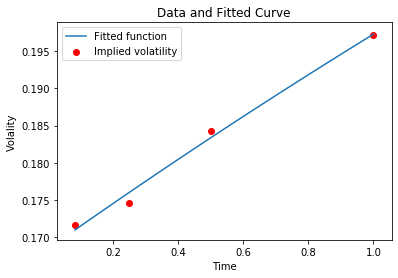

In [99]:
# Add your code here
t = np.linspace(1/12, 1, 50)
y = func(t, popt[0], popt[1], popt[2])
plt.plot(t, y, label='Fitted function')
plt.scatter(Time, imp, label='Implied volatility', color='red')
plt.title("Data and Fitted Curve")
plt.xlabel("Time")
plt.ylabel("Volality")
plt.legend()
plt.show()

In [ ]:
# feel free to use this cell for additional tests

In [ ]:
# feel free to use this cell for additional tests

In [ ]:
# feel free to use this cell for additional tests

In [ ]:
# feel free to use this cell for additional tests

In [ ]:
# feel free to use this cell for additional tests